In this post, we will visualize the Paris Vélib bicycle stations using pandas and then, to do interactive exploration, `bokeh`. The goal is to get familiar with the plotting syntax of `bokeh`, which is quite different from `matplotlib`, the classic plotting package in the Python scientific stack.

# Fetching the data 

JC Decaux, the company responsible for the Paris shared biking system Vélib, has an open-data service available here: [https://developer.jcdecaux.com/#/opendata/vls?page=static](https://developer.jcdecaux.com/#/opendata/vls?page=static). We can use it to fetch the static data describing the different stations.

In [1]:
import pandas as pd

In [2]:
df = pd.read_json("https://developer.jcdecaux.com/rest/vls/stations/Paris.json")

Let's look at the head of the data:

In [3]:
df.head()

,address,latitude,longitude,name,number
0,RUE DES CHAMPEAUX (PRES DE LA GARE ROUTIERE) -...,48.864528,2.416171,31705 - CHAMPEAUX (BAGNOLET),31705
1,52 RUE D'ENGHIEN / ANGLE RUE DU FAUBOURG POISS...,48.872420,2.348395,10042 - POISSONNIÈRE - ENGHIEN,10042
2,74 BOULEVARD DES BATIGNOLLES - 75008 PARIS,48.882149,2.319860,08020 - METRO ROME,8020
3,37 RUE CASANOVA - 75001 PARIS,48.868217,2.330494,01022 - RUE DE LA PAIX,1022
4,139 AVENUE JEAN LOLIVE / MAIL CHARLES DE GAULL...,48.893269,2.412716,35014 - DE GAULLE (PANTIN),35014


Now, let's see what we can do with it!

# Examining the data 

A first question that can be asked is "how many stations are there in each city / neighbourhood?". It turns out that we can extract a 5 digit postcode from each address field quite easily using regular expressions. This is because the `pandas.str.findall` function [accepts regular expressions as arguments](http://pandas.pydata.org/pandas-docs/stable/text.html).

In [4]:
df['postcode'] = [item[0] for item in df.address.str.findall("\d\d\d\d\d")]

In [5]:
df.head()

,address,latitude,longitude,name,number,postcode
0,RUE DES CHAMPEAUX (PRES DE LA GARE ROUTIERE) -...,48.864528,2.416171,31705 - CHAMPEAUX (BAGNOLET),31705,93170
1,52 RUE D'ENGHIEN / ANGLE RUE DU FAUBOURG POISS...,48.872420,2.348395,10042 - POISSONNIÈRE - ENGHIEN,10042,75010
2,74 BOULEVARD DES BATIGNOLLES - 75008 PARIS,48.882149,2.319860,08020 - METRO ROME,8020,75008
3,37 RUE CASANOVA - 75001 PARIS,48.868217,2.330494,01022 - RUE DE LA PAIX,1022,75001
4,139 AVENUE JEAN LOLIVE / MAIL CHARLES DE GAULL...,48.893269,2.412716,35014 - DE GAULLE (PANTIN),35014,93500


This allows us to easily count the number of stations in given locations:

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')

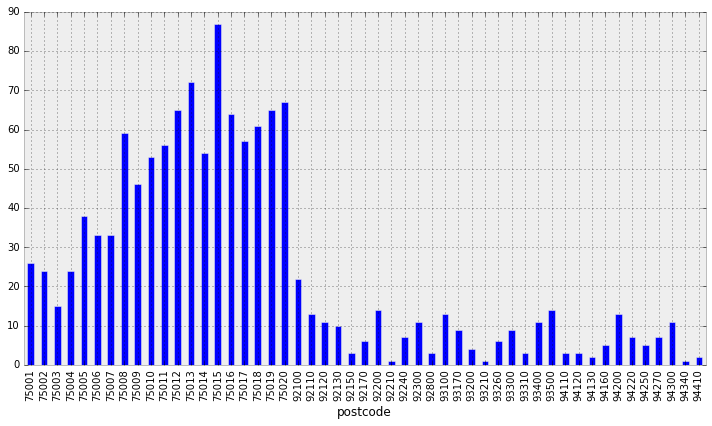

In [7]:
plt.figure(figsize=(10, 6))
df.groupby(by='postcode').size().plot(kind='bar')
plt.tight_layout()

This allows us to determine that there are the most stations in the 15th arrondissement of Paris.

We can also decide to plot each station as a dot on a map. Let's try that:

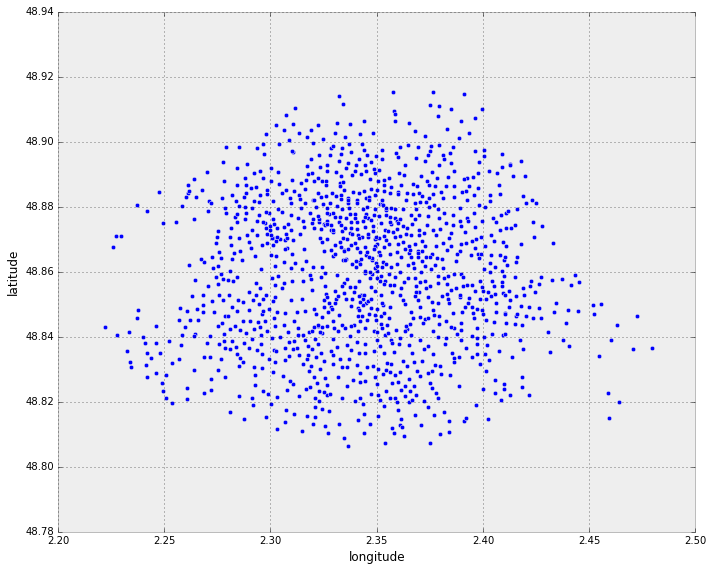

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
df.plot(ax=ax, kind='scatter', x='longitude', y='latitude')
plt.tight_layout()

We can faintly distinguish the Seine River contour, were there are no Vélib stations.

Finally, a last visualization could be to compute the mean coordinates of stations for each postcode and plot them on a map:

In [9]:
mean_stations = df.groupby('postcode').mean()
mean_stations.head()

,latitude,longitude,number
postcode,,,
75001,48.862984,2.339561,1021.384615
75002,48.868225,2.342684,2026.416667
75003,48.862940,2.359657,3013.733333
75004,48.855631,2.356978,4030.791667
75005,48.845414,2.348918,5029.631579


In [10]:
mean_stations.describe()

,latitude,longitude,number
count,51.000000,51.000000,51.000000
mean,48.856930,2.350670,23765.439084
std,0.029586,0.062251,13170.681267
min,48.808535,2.222189,1021.384615
25%,48.832531,2.309834,13470.615741
50%,48.856693,2.348918,21703.833333
75%,48.881089,2.399400,33554.500000
max,48.909302,2.474920,44101.500000


In [11]:
mean_stations['station_count'] = df.groupby(by='postcode').size()

We can also label the points [as in this SO thread](http://stackoverflow.com/questions/15910019/annotate-data-points-while-plotting-from-pandas-dataframe/15911372#15911372).

In [12]:
def label_point(x, y, val, ax):
    a = pd.DataFrame({'x': x, 'y': y, 'val': val})
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

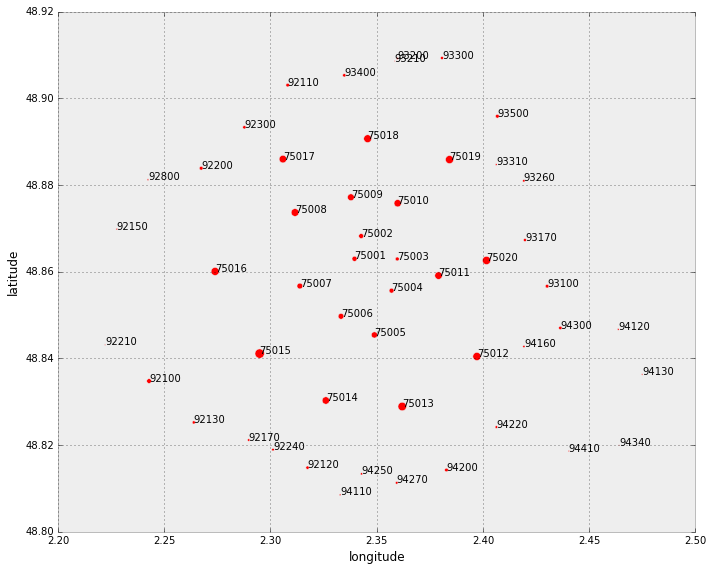

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
mean_stations.plot(ax=ax, kind='scatter', x='longitude', y='latitude', s=mean_stations['station_count'], color='red')
label_point(mean_stations.longitude.values, mean_stations.latitude.values, mean_stations.index, ax)
plt.tight_layout()

In [14]:
mean_stations.latitude.values

array([ 48.86298384,  48.86822491,  48.86294019,  48.85563069,
        48.84541393,  48.84970745,  48.85669329,  48.87365634,
        48.87717112,  48.8757906 ,  48.85910098,  48.8404467 ,
        48.82890592,  48.83029111,  48.84110915,  48.86006093,
        48.88597374,  48.89068584,  48.88586487,  48.8625977 ,
        48.83477101,  48.90304026,  48.81480097,  48.82522672,
        48.86982978,  48.82117249,  48.88387195,  48.84312621,
        48.81895035,  48.89330857,  48.88121858,  48.85665367,
        48.86730718,  48.90918588,  48.90858672,  48.88096003,
        48.90930234,  48.88471616,  48.90529932,  48.89585992,
        48.80853453,  48.84670081,  48.83630349,  48.84275142,
        48.81425975,  48.82415844,  48.81336175,  48.81130206,
        48.84703447,  48.8199541 ,  48.81861291])

Finally, we can put everything together: stations and mean locations of stations.

In [15]:
s = df.groupby(by='postcode').size()
cmap = list(s.index.values)

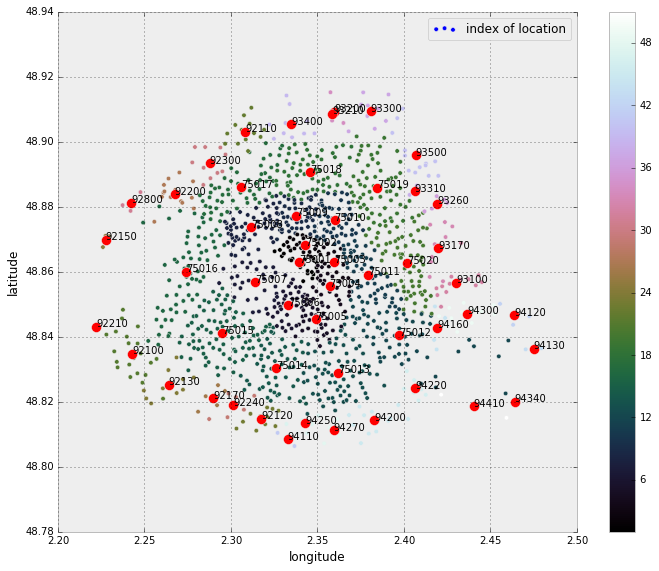

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))
df.plot(ax=ax, kind='scatter', x='longitude', y='latitude', 
        c=[cmap.index(item) + 1 for item in df.postcode.values],
       colormap='cubehelix', label='index of location')
mean_stations.plot(ax=ax, kind='scatter', x='longitude', y='latitude', s=100, color='red')
label_point(mean_stations.longitude.values, mean_stations.latitude.values, mean_stations.index, ax)
plt.tight_layout()

# Using Bokeh 

The maps I plotted in the previous section were static. This is a limiting factor when exploring a dataset. To really come to grips with the data, it is often useful to make it interactive, which is what we will do using `bokeh`. We will follow the [quickstart guide to Bokeh](http://bokeh.pydata.org/en/latest/docs/user_guide/quickstart.html#userguide-quickstart) and try to obtain the same plots as above using this framework.

To get a feeling for how `bokeh` works, we will first use the high level `bokeh.charts` interface and then the medium and low-level `bokeh.plotting` and `bokeh.models`.

## High level version 

First, we import the different elements we need for bokeh.

In [17]:
import bokeh.plotting as bp

Let's tell bokeh to show things in the notebook:

In [18]:
bp.output_notebook()

Loading BokehJS ...

Now, let's use the high level function found the charts module:

In [19]:
import bokeh.charts

In [20]:
p = bokeh.charts.Scatter(df, x='longitude', y='latitude', color='postcode',
                        tools="crosshair, hover, wheel_zoom, pan")
bp.show(p)

That was easy! The visualization is interesting and we didn't have much to do to obtain it.

What if we want a hover tool displaying the address over each station? I didn't find any easy way to extend the previous chart, so let's switch to a lower level of plotting and do this in detail.

## Medium and low-level bokeh 

We now need to do the following things to make our plot, from the medium or low-level perspective:

- create a figure
- add renderers (points in our cases)
- show the plot

Let's do a simple scatter plot to show how this goes:

In [21]:
p = bp.figure(title="simple scatter plot")
p.scatter(x=df.longitude.values, y=df.latitude.values)
bp.show(p)

Now, let's customize this plot a little more:

- add colors to each dot according to postcode
- add labels showing the adress of a station using hovering

We will start with the colors. I didn't figure out how to apply this easily with bokeh, so I had to resort to a manual generation of each color code using matplotlib classes, in particular a ScalarMappable.

In [22]:
import matplotlib as mpl

color_index = pd.Series([cmap.index(item) for item in df.postcode.values])
norm = mpl.colors.Normalize()
norm.autoscale(color_index)
sm = mpl.cm.ScalarMappable(norm, 'hot')

We can test the output into rgba space using `to_rgba`:

In [23]:
sm.to_rgba(0.1, bytes=True)

(10, 0, 0, 255)

Finally, let's just generate the list of colors we need:

In [24]:
colors = [
    "#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g, b, a in [sm.to_rgba(item, bytes=True) for item in color_index]
]

In [25]:
colors[:10]

['#ffb700',
 '#830000',
 '#660000',
 '#0a0000',
 '#ffff22',
 '#ff0a00',
 '#ff9d00',
 '#c40000',
 '#9d0000',
 '#730000']

Let's now customize the tooltip shown while hovering. The way to do this is well described in the [Bokeh tutorial about interactions](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/tutorial/04%20-%20interactions.ipynb):

- we need to build a datasource containing a description field
- and a hover tool, based on this description field from the data source


In [26]:
import bokeh.models as bm

source = bm.ColumnDataSource(
        data=dict(
            x=df.longitude.values,
            y=df.latitude.values,
            c=colors,
            desc=df.address.values,
        )
    )

hover = bm.HoverTool(
        tooltips=[
            ("address", "@desc"),
        ]
    )


pan = bm.PanTool()
zoom = bm.WheelZoomTool()

Finally, here's the scatter plot, in low-level plotting language, with hovering tooltips! 

In [27]:
p = bp.figure(title="Vélib stations in Paris", 
              tools=[hover, pan, zoom])
p.circle(x='x', y='y', fill_color='c', size=10, source=source)

bp.show(p)

I've just found out that it is possible to [plot markers on top of a Google Map using `bokeh`](http://bokeh.pydata.org/en/latest/docs/user_guide/geo.html). Let's try and do this:

In [28]:
geo_source = bm.GeoJSONDataSource(
        data=dict(
            x=df.longitude.values,
            y=df.latitude.values,
            c=colors,
            desc=df.address.values,
        )
    )

hover = bm.HoverTool(
        tooltips=[
            ("address", "@desc"),
        ]
    )


pan = bm.PanTool()
zoom = bm.WheelZoomTool()

p = bp.figure(title="Vélib stations in Paris", 
              tools=[hover, pan, zoom])
p.circle(x='x', y='y', fill_color='c', size=10, source=geo_source)

bp.show(p)

Unfortunately, this doesn't work, yet. There are several bug reports describing this behaviour (one of them is here: [https://github.com/bokeh/bokeh/issues/3737](https://github.com/bokeh/bokeh/issues/3737)). Hopefully, this will get fixed soon!

# Using Folium 

A last thing I wanted to try was to use Folium for displaying interactive maps. It seems very simple to use to get markers on a map using an OpenStreetMap tiling.

In [29]:
import folium

In [30]:
map_osm = folium.Map(location=[48.86, 2.35])
for lng, lat, desc in zip(df.longitude.values,
                         df.latitude.values,
                         df.address.values):
    map_osm.circle_marker([lat, lng], radius=100, popup=desc)
map_osm

That's it for today! I hope you had fun!

This post was entirely written using the IPython notebook. Its content is BSD-licensed. You can see a static view or download this notebook with the help of nbviewer at [20160205_VisualizingVelibStations.ipynb](http://nbviewer.ipython.org/urls/raw.github.com/flothesof/posts/master/20160205_VisualizingVelibStations.ipynb).